# House Price: EDA, GradientBoost


Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

[Link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) to Kaggle page


## Loading Data

In [1]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques -w

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
print(train.columns)

print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#train.info()

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\Joe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


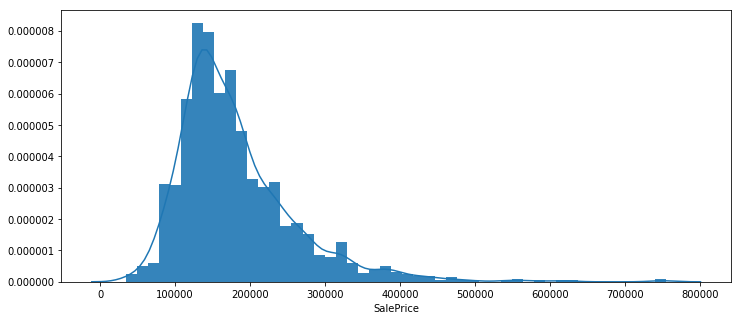

In [8]:
plt.figure(figsize = (12,5))
sns.distplot(train['SalePrice'], hist_kws = {'alpha':.9})

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Initial Observations

- Not a normal distribution
- Right Skewed

### Exploring Numeric Variables

In [10]:
numeric_cols = train._get_numeric_data().columns

numeric_cols, numeric_cols.shape

(Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'), (38,))

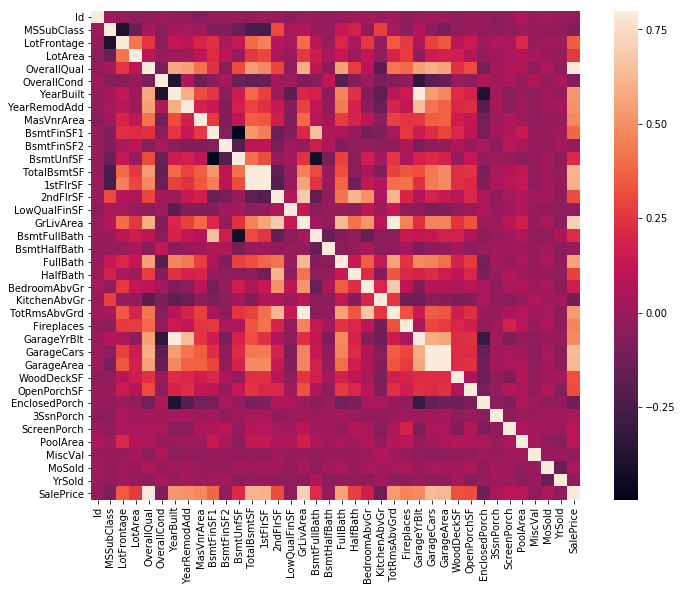

In [11]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(),vmax = .8, square = True)

It's a bit cluttered. The next plot only shows the 10 most correlated factors.

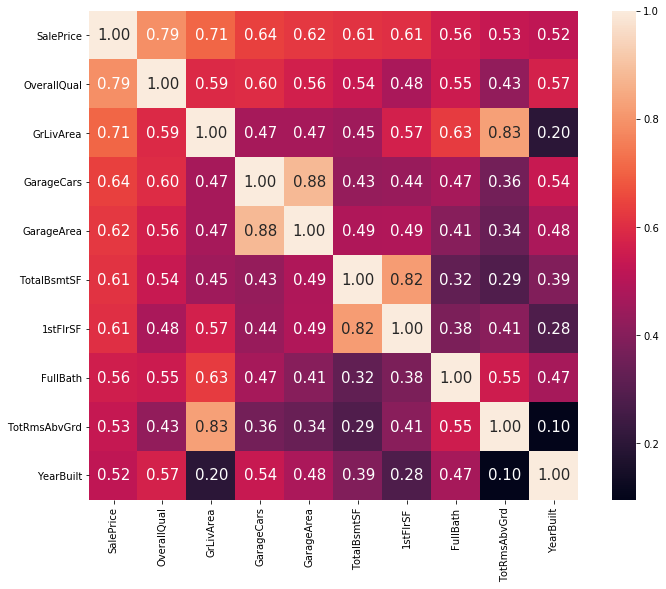

In [12]:
#saleprice correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
#sns.set(font_scale=.9)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Initial Observations
- Overall Quality has the highest correlation coefficient at .79
- GrLivArea has the second highest at .71


### Overall Quality

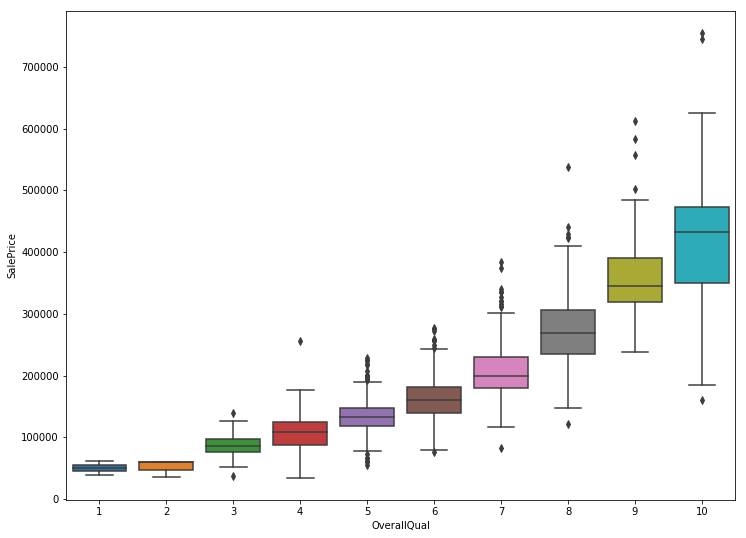

In [13]:
plt.figure(figsize = (12,9))
sns.boxplot(x = 'OverallQual', y = 'SalePrice' ,data = train)


It's clear that there is a positive correlation as expected. This makes sense because a higher quality house should mean a more valuable house.

## Above Ground Living Area

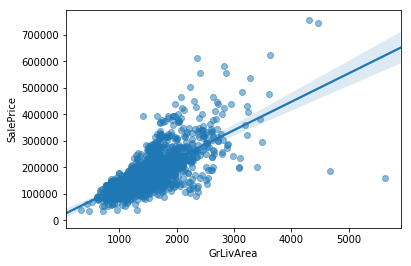

In [14]:
sns.regplot(x='GrLivArea', y ='SalePrice', data = train,scatter_kws={'alpha':0.5})

##  Missing data, label encoding, and factorizing variables

In [15]:
#data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
#                      test.loc[:,'MSSubClass':'SaleCondition']))
test['SalePrice'] = np.nan
data= pd.concat([train,test]).reset_index().drop('index',axis=1)

In [16]:
data.shape

(2919, 81)

In [17]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
dtype: int64

In [18]:
train.shape, test.shape

((1460, 81), (1459, 81))

### Handling Missing Data

#### Pool Quality and Pool Area
The PoolQC is the variable with most NAs. The description is as follows:

PoolQC: Pool quality

|Label |  Meaning        |
|------|-----------------|
|   Ex |  Excellent      |
|   Gd |  Good           |
|   TA |  Average/Typical|
|   Fa |  Fair           |
|   Po |  Poor           |
|   NA |  No Pool        |

Imputing 'None' for null values makes the most sense
   

In [19]:
data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [20]:
data['PoolQC'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

In [21]:
data['PoolQC'] = data['PoolQC'].fillna('None')

In [22]:
data['PoolQC'].head()

0    None
1    None
2    None
3    None
4    None
Name: PoolQC, dtype: object

In [23]:
mapper = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data['PoolQC'] = data['PoolQC'].apply(lambda x : mapper[x])

In [24]:
data.isnull().sum().sort_values(ascending = False).head(15)

MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageCond       159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
dtype: int64

In [25]:
temp = data.loc[(data['PoolArea'] != 0) & (data['PoolQC'] == 0),['PoolQC','PoolArea','OverallQual']].index
data.loc[(data['PoolArea'] > 0) & (data['PoolQC'] == 0),['PoolQC','PoolArea','OverallQual']]


,PoolQC,PoolArea,OverallQual
2420,0,368,4
2503,0,444,6
2599,0,561,3


In [26]:
data.loc[(data['PoolArea'] != 0) & (data['PoolQC'] == 0),'PoolQC'] = data.loc[(data['PoolArea'] != 0) & (data['PoolQC'] == 0),'OverallQual']
data.iloc[temp]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2420,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,368,4,GdPrv,NaN,0,2,2007,WD,Normal,NaN
2503,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,...,444,6,NaN,NaN,0,4,2007,WD,Normal,NaN
2599,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,...,561,3,GdPrv,NaN,0,6,2007,WD,Normal,NaN


### Miscellaneous feature not covered in other categories

In [27]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(15)

MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageCond       159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
dtype: int64

In [28]:
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [29]:
data['MiscFeature'] = data['MiscFeature'].fillna('None')

In [30]:
data['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [31]:
data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

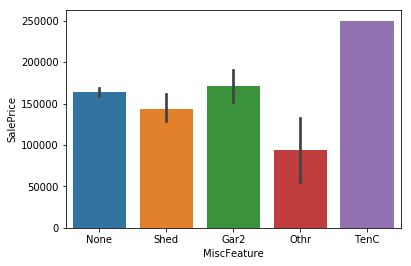

In [32]:
sns.barplot(x = 'MiscFeature', y='SalePrice', data = data, estimator = np.median)

This variable could be not as important. The overall majority of them have no value.

### Alley

In [33]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(15)

Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
dtype: int64

In [34]:
data['Alley'] = data['Alley'].fillna('None')

In [35]:
data['Alley'].value_counts()

None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

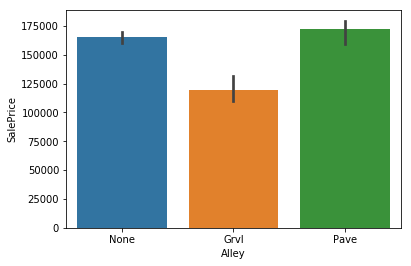

In [36]:
sns.barplot(x = 'Alley', y='SalePrice', data = data, estimator = np.median)

In [37]:
to_dummies = ['Alley']

This variable does not seem to be ordinal. So we will use dummy variables later to properly encode this

### Fence

|Label |  Meaning        |
|------|-----------------|
|GdPrv |  Good Privacy   |
|MnPrv |  Minimum Privacy|
|  GdWo|  Good Wood      |
| MnWw |Minimum Wood/Wire|
|   NA |  No Fence       |




In [38]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(10)

Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
dtype: int64

In [39]:
data['Fence'] = data['Fence'].fillna('None')

In [40]:
data['Fence'].value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

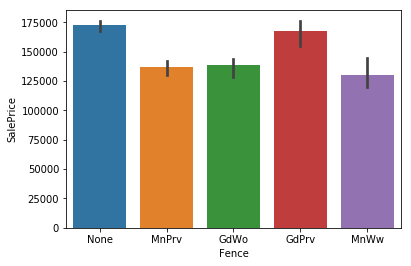

In [41]:
sns.barplot(x = 'Fence', y='SalePrice', data = data, estimator = np.median)

### Fireplace Variables

In [42]:
data[data['SalePrice'].isnull() == False].isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(10)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
dtype: int64

In [43]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

In [44]:
data['FireplaceQu'].value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [45]:
o = [ 'Po','None', 'Fa', 'TA', 'Gd','Ex']

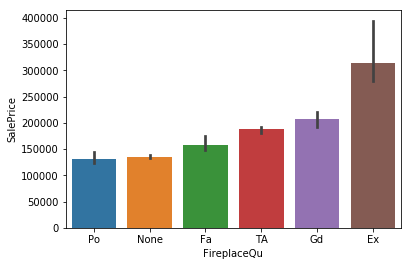

In [46]:
sns.barplot(x = 'FireplaceQu', y='SalePrice',order = o, data = data, estimator = np.median)

It seems to be ordinal with a poor fireplace is worse than having no fireplace. We shall encode the variables numerically

In [47]:
mapper = {'None':1,'Po':0,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data['FireplaceQu'] = data['FireplaceQu'].apply(lambda x : mapper[x])

In [48]:
data['FireplaceQu'].value_counts()

1    1420
4     744
3     592
2      74
0      46
5      43
Name: FireplaceQu, dtype: int64

### Lot

In [49]:
data[data['SalePrice'].isnull() == False].isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(10)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
dtype: int64

C:\Users\Joe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


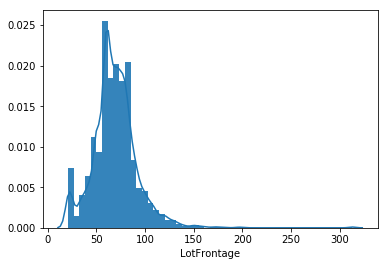

In [50]:
sns.distplot(data['LotFrontage'].dropna(), hist_kws = {'alpha':.9})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

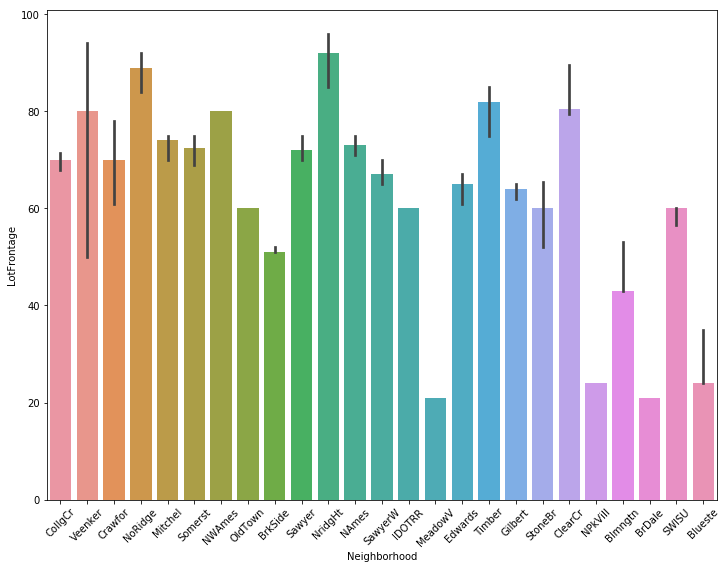

In [51]:
plt.figure(figsize = (12,9))
sns.barplot(x = 'Neighborhood', y='LotFrontage', data = data, estimator = np.median)
plt.xticks(rotation = 45)

We will impute the median by neighborhood for the null values

In [52]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [53]:
data[data['SalePrice'].isnull() == False].isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(10)

GarageYrBlt     81
GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
dtype: int64

While we are cleaning up lot, lets go ahead and do the other lot variables

In [54]:
data['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

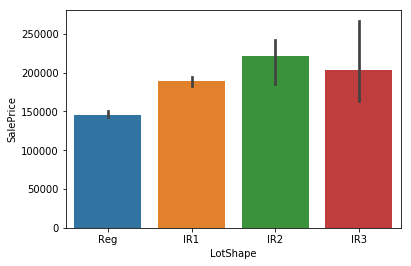

In [55]:
sns.barplot(x = 'LotShape', y='SalePrice', data = data, estimator = np.median)

It seems like Houses that are regular are less valuable. However, at some point, irregularity becomes a negative factor.

In [56]:
mapper = {'Reg':0,'IR1':1,'IR2':3,'IR3':2}
data['LotShape'] = data['LotShape'].apply(lambda x : mapper[x])

In [57]:
data['LotShape'].value_counts()

0    1859
1     968
3      76
2      16
Name: LotShape, dtype: int64

In [58]:
data['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

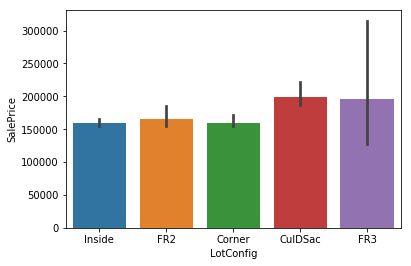

In [59]:
sns.barplot(x = 'LotConfig', y='SalePrice', data = data, estimator = np.median)

It doesn't seem to be ordinal. We will use dummy variables later

In [60]:
to_dummies.append('LotConfig')

#### Garage Variables



In [61]:
data[data['SalePrice'].isnull() == False].isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(10)

GarageYrBlt     81
GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
dtype: int64

In [62]:
data[['YearBuilt','GarageYrBlt']].head()

,YearBuilt,GarageYrBlt
0,2003,2003.0
1,1976,1976.0
2,2001,2001.0
3,1915,1998.0
4,2000,2000.0


We can see that YearBuilt is very simillar to GarageYrBlt. We will use this to impute missing values for GarageYrBlt

In [63]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt'] = data.loc[data['GarageYrBlt'].isnull()==True,'YearBuilt'] 

In [64]:
data[data['SalePrice'].isnull() == False].isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head()

GarageType      81
GarageCond      81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
dtype: int64

In [65]:
data.loc[data['GarageType'].isnull(),['GarageType','GarageCond','GarageFinish','GarageQual']].head()

,GarageType,GarageCond,GarageFinish,GarageQual
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN


It looks like null values in the garage variables are houses with no garages. We will impute these with 'None'


In [66]:
data[['GarageType','GarageCond','GarageFinish','GarageQual']]=data[['GarageType','GarageCond','GarageFinish','GarageQual']].fillna('None')

In [67]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(6)

SalePrice       1459
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
dtype: int64

BsmtFinType1 has the least amount of NAs. Meaning we can impute some of the NA values in the other variables. We will use the mode to impute.

In [68]:
bsmt = ['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']

for i in bsmt:    
    data.loc[(data['BsmtFinType1'].notna())&(data[i].isna()),i] = data[i].mode().values


In [69]:
data[bsmt]= data[bsmt].fillna('None')

In [70]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0]

SalePrice       1459
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
Functional         2
BsmtFinSF2         1
SaleType           1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
Exterior2nd        1
GarageArea         1
GarageCars         1
dtype: int64

In [71]:
data[['BsmtFinSF2','TotalBsmtSF']]=data[['BsmtFinSF2','TotalBsmtSF']].fillna(0)

In [72]:
data[bsmt].head()

,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1
0,No,TA,Gd,Unf,GLQ
1,Gd,TA,Gd,Unf,ALQ
2,Mn,TA,Gd,Unf,GLQ
3,No,Gd,TA,Unf,ALQ
4,Av,TA,Gd,Unf,GLQ


#### Programmatically Encoding Basement Variables

There are a lot of ordinal variables. Let's do it automatically.

In [73]:
for i in bsmt:
    cats = list(data[[i,'SalePrice']].groupby(i).median().sort_values(by='SalePrice').index)
    mapper= dict(zip(cats,range(len(cats))))
    data[i] = data[i].apply(lambda x : mapper[x])
    

In [74]:
data[bsmt].head()

,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1
0,1,3,3,4,6
1,4,3,3,4,4
2,2,3,3,4,6
3,1,4,2,4,4
4,3,3,3,4,6


In [75]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head()

SalePrice       1459
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
dtype: int64

In [127]:
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0) 
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0) 

#### Masonry Veneer

In [78]:
data[(data['MasVnrType'].isnull())&(data['MasVnrArea'].notnull())][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
2610,NaN,198.0


In [92]:
data.loc[(data['MasVnrType'].isnull())&(data['MasVnrArea'].notnull()),'MasVnrType'] = data['MasVnrType'].value_counts().index[1] # Gets the 2nd mode

In [93]:
data[(data['MasVnrType'].isnull())&(data['MasVnrArea'].notnull())][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea


In [95]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] =data['MasVnrArea'].fillna(0)

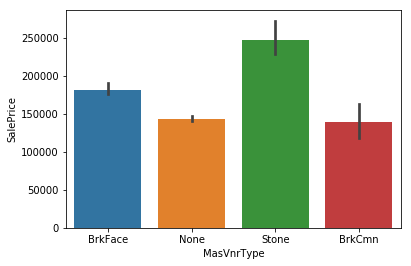

In [96]:
sns.barplot(x = 'MasVnrType', y='SalePrice', data = data, estimator = np.median)

In [98]:

cats = list(data[['MasVnrType','SalePrice']].groupby('MasVnrType').median().sort_values(by='SalePrice').index)
mapper= dict(zip(cats,range(len(cats))))
data['MasVnrType'] = data['MasVnrType'].apply(lambda x : mapper[x])

In [100]:
data['MasVnrType'].value_counts()

1    1765
2     880
3     249
0      25
Name: MasVnrType, dtype: int64

#### MSZoning

|Label |  Meaning        |
|------|-----------------|
|A |  Agriculture   |
|C |  Commercial|
|  FV|  Floating Village Residential      |
| I |Industrial|
|   RH |  Residential High Density       |
|   RL |  Residential Low Density       |
|   RP |  Residential Low Density Park       |
|   RM |  Residential Medium Density       |


In [102]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head()

SalePrice       1459
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
dtype: int64

In [104]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [119]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode().values[0])

In [122]:
to_dummies.append('MSZoning')

In [129]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].head(10)

SalePrice      1459
Utilities         2
Functional        2
BsmtFinSF1        1
Electrical        1
Exterior2nd       1
Exterior1st       1
KitchenQual       1
GarageCars        1
GarageArea        1
dtype: int64

In [126]:
data['BsmtFullBath'].mode()

0    0.0
dtype: float64

#### Utilities



In [131]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [133]:
data.drop('Utilities', axis = 1, inplace = True)

#### Home Functionality


|Label |  Meaning        |
|------|-----------------|
|Typ   | Typical Functionality|
|   Min1| Minor Deductions 1|
|   Min2 |Minor Deductions 2|
|   Mod  |Moderate Deductions|
|   Maj1 |Major Deductions 1|
|   Maj2| Major Deductions 2|
|   Sev | Severely Damaged|
|   Sal | Salvage only|

In [137]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0]

SalePrice      1459
Functional        2
SaleType          1
BsmtFinSF1        1
BsmtUnfSF         1
Electrical        1
GarageCars        1
GarageArea        1
KitchenQual       1
Exterior1st       1
Exterior2nd       1
dtype: int64

In [138]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [144]:
data['Functional'].mode()[0]

'Typ'

In [146]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])

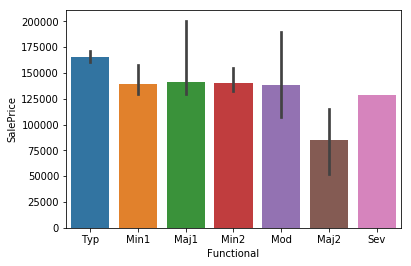

In [148]:
sns.barplot(x = 'Functional', y='SalePrice', data = data, estimator = np.median)

In [149]:
cats = list(data[['Functional','SalePrice']].groupby('Functional').median().sort_values(by='SalePrice').index)
mapper= dict(zip(cats,range(len(cats))))
data['Functional'] = data['Functional'].apply(lambda x : mapper[x])

In [150]:
data['Functional'].value_counts()

6    2719
4      70
3      65
2      35
5      19
0       9
1       2
Name: Functional, dtype: int64

#### SaleType

In [151]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0]

SalePrice      1459
SaleType          1
BsmtUnfSF         1
BsmtFinSF1        1
Electrical        1
GarageCars        1
GarageArea        1
Exterior1st       1
KitchenQual       1
Exterior2nd       1
dtype: int64

In [154]:
data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [156]:
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [158]:
to_dummies.append('SaleType')

#### Garage

In [159]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0]

SalePrice      1459
GarageArea        1
Electrical        1
BsmtFinSF1        1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
GarageCars        1
BsmtUnfSF         1
dtype: int64

In [173]:
data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].median())
data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].median())

In [174]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0]

SalePrice      1459
BsmtUnfSF         1
Electrical        1
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
KitchenQual       1
dtype: int64

#### Rest of NAs

In [179]:
temp = data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0].index.values

In [193]:
data[temp].head()

,SalePrice,BsmtUnfSF,Electrical,Exterior1st,Exterior2nd,BsmtFinSF1,KitchenQual
0,208500.0,150.0,SBrkr,VinylSd,VinylSd,706.0,2
1,181500.0,284.0,SBrkr,MetalSd,MetalSd,978.0,1
2,223500.0,434.0,SBrkr,VinylSd,VinylSd,486.0,2
3,140000.0,540.0,SBrkr,Wd Sdng,Wd Shng,216.0,2
4,250000.0,490.0,SBrkr,VinylSd,VinylSd,655.0,2


In [185]:
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].median())
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].median())


In [186]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])




In [190]:
cats = list(data[['KitchenQual','SalePrice']].groupby('KitchenQual').median().sort_values(by='SalePrice').index)
mapper= dict(zip(cats,range(len(cats))))
data['KitchenQual'] = data['KitchenQual'].apply(lambda x : mapper[x])

In [209]:
for i in ['Electrical','Exterior1st','Exterior2nd']:
    to_dummies.append(i)

In [192]:
data.isnull().sum().sort_values(ascending = False)[data.isnull().sum().sort_values(ascending = False) != 0]

SalePrice    1459
dtype: int64

## More encoding and Factorizing

In [200]:

categories = data.select_dtypes(include=['object']).columns
data.select_dtypes(include=['object']).head()



,MSZoning,Street,Alley,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,SBrkr,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
1,RL,Pave,None,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,SBrkr,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
2,RL,Pave,None,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,SBrkr,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
3,RL,Pave,None,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,SBrkr,Detchd,Unf,TA,TA,Y,None,None,WD,Abnorml
4,RL,Pave,None,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,SBrkr,Attchd,RFn,TA,TA,Y,None,None,WD,Normal


In [205]:
categories

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [224]:
cols = ['GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'HeatingQC',
       'Fence', 'GarageFinish', 'LandSlope', 'PavedDrive', 'Street', 'Alley',
       'CentralAir']

In [230]:
data[cols].select_dtypes(include=['object']).head()

,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,Fence,GarageFinish,LandSlope,PavedDrive,Street,Alley,CentralAir
0,TA,TA,Gd,TA,Ex,None,RFn,Gtl,Y,Pave,None,Y
1,TA,TA,TA,TA,Ex,None,RFn,Gtl,Y,Pave,None,Y
2,TA,TA,Gd,TA,Ex,None,RFn,Gtl,Y,Pave,None,Y
3,TA,TA,TA,TA,Gd,None,Unf,Gtl,Y,Pave,None,Y
4,TA,TA,Gd,TA,Ex,None,RFn,Gtl,Y,Pave,None,Y


In [231]:
for i in cols:
    cats = list(data[[i,'SalePrice']].groupby(i).median().sort_values(by='SalePrice').index)
    mapper= dict(zip(cats,range(len(cats))))
    data[i] = data[i].apply(lambda x : mapper[x])

In [235]:
dummies = data.select_dtypes(include=['object']).columns

In [244]:
final_df  = pd.concat([data.drop(dummies,axis = 1),pd.get_dummies(data[dummies])], axis = 1)

In [245]:
final_df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [247]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,14,65.0,8450,1,1,0,0,7,8,...,0,0,0,1,0,0,0,0,1,0
1,2,10,80.0,9600,1,1,0,0,6,4,...,0,0,0,1,0,0,0,0,1,0
2,3,14,68.0,11250,1,1,1,0,7,8,...,0,0,0,1,0,0,0,0,1,0
3,4,9,60.0,9550,1,1,1,0,7,8,...,0,0,0,1,1,0,0,0,0,0
4,5,14,84.0,14260,1,1,1,0,8,8,...,0,0,0,1,0,0,0,0,1,0


## Building the Model

In [248]:
df = final_df[final_df['SalePrice'].notnull()]

In [365]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [409]:
X = df.drop(['SalePrice','Id'],axis =1)
y = df['SalePrice']

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = .30, random_state = 0)

In [411]:
reg = GradientBoostingRegressor().fit(X_train, y_train)

In [412]:
y_pred = reg.predict(X_test)

In [413]:
np.sqrt(mean_squared_error(y_test, y_pred))

29489.6052981391

In [414]:
rmsle(y_pred, y_test)

0.12655106354453285

In [348]:
from sklearn.model_selection import GridSearchCV
parameters = {
    
    'learning_rate': [.03, 0.05, .07],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [4,10,15,20],
    'min_samples_split': [4,10,15,20]
}

xgb = GradientBoostingRegressor(n_estimators=3000, random_state =0,max_features='sqrt', loss='huber')

In [349]:
reg_grid = GridSearchCV(xgb,parameters,cv = 2,n_jobs = 7, verbose=True)

In [350]:
reg_grid.fit(X_train, y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   25.2s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  1.9min
[Parallel(n_jobs=7)]: Done 288 out of 288 | elapsed:  2.9min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params=None, iid=True, n_jobs=7,
       param_grid={'learning_rate': [0.03, 0.05, 0.07], 'max_depth': [3, 4, 5], 'min_samples_leaf': [4, 10, 15, 20], 'min_samples_split': [4, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [354]:
rmsle(y_test,reg_grid.predict(X_test))

0.12716233184758116

In [355]:
reg_grid.best_params_

{'learning_rate': 0.03,
 'max_depth': 3,
 'min_samples_leaf': 15,
 'min_samples_split': 4}

In [356]:
np.sqrt(mean_squared_error(y_test, reg_grid.predict(X_test)))

31476.36370509674

## Making my Submission

In [415]:
gboost = GradientBoostingRegressor(n_estimators=3000, random_state =0,max_features='sqrt', loss='huber',learning_rate=.03, max_depth=3, min_samples_leaf=15, min_samples_split=4)

In [416]:
gboost.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [418]:
sale_price = gboost.predict(final_df[final_df['SalePrice'].isnull()].drop(['SalePrice','Id'],axis=1))
submission = final_df.loc[final_df['SalePrice'].isnull()].drop('SalePrice',axis = 1)
submission['SalePrice'] = sale_price
submission[['Id','SalePrice']].to_csv('submission.csv',index = False)